In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [61]:
H = 0.25
L = 1

alpha = 207*10**(-6) #Volume expansion coefficient of water @ 20 C
k = 0.6     #Thermal conductivity of water @ 20 C

#ReC = 1100.65 #Critical Rayleigh number for one free and one rigid boundary condition
ReC = 1708     #Critical Rayleigh number for two rigid body boundary condition
g = 9.81
D = 0.143E-6  #Thermal diffusivity of water
rho_i = 1000   #Density of water @ 20 C

L = 10
H = 1

nxy = 101
nt = 10000

dxy = L/(nxy-1)

x = np.linspace(0,L,nxy)
y = np.linspace(0,H,nxy)

#Change to Kelivin?
To = 20
vo = 2.414*10**(-5) * 10**(247.8/(To + 273 - 140)) / rho_i  #initial kinematic viscosity of water
delT = (ReC*vo*1.43*10**(-7))/(alpha*g*H**3)
Ti = np.ones((nxy, nxy))*To
Ti[-1,:] = To + 30

rho = np.ones((nxy,nxy), dtype=float)*rho_i
rho[0,:] = rho_i*(1-alpha*(Ti[0,:] - To))

v = np.ones((nxy,nxy))*2.414*10**(-5) * 10**(247.8/(Ti + 273 - 140)) / rho  #kinematic viscosity of water

pi = np.zeros((nxy,nxy), dtype=float)
pi[:,:] = rho[:,:] * y[:] * g

ui = np.zeros((nxy,nxy), dtype=float)

print('delT =',delT, 'Tl =',20+delT)
print(vo)
#print('x =', x, 'y =', y)

delT = 1.209287767702047e-07 Tl = 20.000000120928778
1.0054144180571545e-06


In [62]:
# stability
sigma = 0.00005
#dt = sigma*min(dxy,dxy)**2/D
dt = 0.001

print(dt)

0.001


In [63]:
print(dxy)

0.1


In [64]:
def ftcs(T, To, u, p, rho, rho_i, alpha, v, k, g, y, delT, nt, dt, dxy):
    
    for n in range(nt):
        
        # Boundary conditions
        u[-1,:] = 0 #Top Boundary
        u[0,:] = 0   #Bottom Boundary
        T[-1,:] = To + 30 #Bottom Boundary
        T[0,:] = To   #top Boundary

        un = u.copy()
        Tn = T.copy()
        pn = p.copy()
        vn = v.copy()
        T[1:-1,1:-1] = Tn[1:-1,1:-1] + dt*((un[1:-1,1:-1]/dxy)*(Tn[2:,1:-1]\
                    + Tn[1:-1,2:] - (2*Tn[1:-1,1:-1])) + 
                    (k/dxy**2)*(Tn[2:,1:-1] + Tn[:-2,1:-1] + Tn[1:-1,2:]\
                    + Tn[1:-1,:-2] - (4*Tn[1:-1,1:-1])))
        
        rho[1:-1,1:-1] = rho_i*(1- alpha*(T[1:-1,1:-1] - 20))
        p[1:-1,1:-1] = rho[1:-1,1:-1]*y[1:-1] * g
        
        
        u[1:-1,1:-1] = un[1:-1,1:-1] + dt*(-(1/rho_i)*(p[2:,1:-1] + p[1:-1,2:] - 2*p[1:-1,1:-1]) + (rho[1:-1,1:-1]*g/rho_i)\
                                           + (1/dxy)*(u[1:-1,1:-1]*0.5*(u[2:,1:-1] - u[:-2,1:-1] \
                                                                      + u[1:-1,2:] - u[1:-1,:-2]) \
                                           + (v[1:-1,1:-1]/dxy)*(u[2:,1:-1] + u[:-2,1:-1] + u[1:-1,2:] + u[1:-1,:-2] - 4*u[1:-1,1:-1])))

                                           
    return T

In [65]:
#T = ftcs(Ti,To,ui,pi,rho,rho_i,alpha,v,k,g,y,delT,nt,dt,dxy)
# Boundary conditions
ya = np.ones((nxy,nxy))
for i in range(nxy):
    ya[:,i] = y
un = ui.copy()
Tn = Ti.copy()
pn = pi.copy()
vn = v.copy()
Ti[1:-1,1:-1] = Tn[1:-1,1:-1] + dt*((un[1:-1,1:-1]/dxy)*(Tn[2:,1:-1]\
                    + Tn[1:-1,2:] - (2*Tn[1:-1,1:-1])) + 
                    (k/dxy**2)*(Tn[2:,1:-1] + Tn[:-2,1:-1] + Tn[1:-1,2:]\
                    + Tn[1:-1,:-2] - (4*Tn[1:-1,1:-1])))
rho[1:-1,1:-1] = rho_i*(1- alpha*(Ti[1:-1,1:-1] - 20))
pi[1:-1,1:-1] = rho[1:-1,1:-1]*ya[1:-1,1:-1] * g

ui[-1,:] = 0 #Top Boundary
ui[0,:] = 0   #Bottom Boundary
Ti[-1,:] = To + 30 #Bottom Boundary
Ti[0,:] = To   #top Boundary


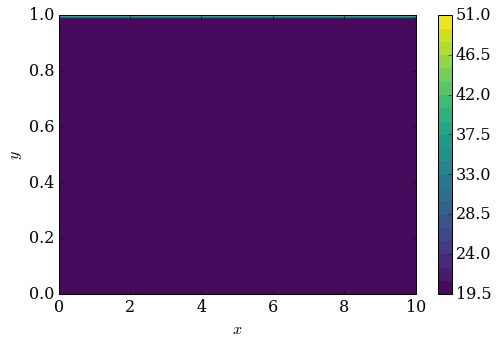

In [66]:
plt.figure(figsize=(8,5))
plt.contourf(x,y,Ti,20,cmap=cm.viridis)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.colorbar();


In [67]:
print(rho)

[[ 1000.      1000.      1000.     ...,  1000.      1000.      1000.    ]
 [ 1000.      1000.      1000.     ...,  1000.      1000.      1000.    ]
 [ 1000.      1000.      1000.     ...,  1000.      1000.      1000.    ]
 ..., 
 [ 1000.      1000.      1000.     ...,  1000.      1000.      1000.    ]
 [ 1000.       999.6274   999.6274 ...,   999.6274   999.6274  1000.    ]
 [ 1000.      1000.      1000.     ...,  1000.      1000.      1000.    ]]


In [68]:
print(dt)

0.001


In [69]:
print(Ti)

[[ 20.   20.   20.  ...,  20.   20.   20. ]
 [ 20.   20.   20.  ...,  20.   20.   20. ]
 [ 20.   20.   20.  ...,  20.   20.   20. ]
 ..., 
 [ 20.   20.   20.  ...,  20.   20.   20. ]
 [ 20.   21.8  21.8 ...,  21.8  21.8  20. ]
 [ 50.   50.   50.  ...,  50.   50.   50. ]]


In [70]:
print(pi)

[[    0.            98.1          196.2        ...,  9613.8         9711.9
   9810.        ]
 [    0.            98.1           98.1        ...,    98.1           98.1
   9810.        ]
 [    0.           196.2          196.2        ...,   196.2          196.2
   9810.        ]
 ..., 
 [    0.          9613.8         9613.8        ...,  9613.8         9613.8
   9810.        ]
 [    0.          9708.28134606  9708.28134606 ...,  9708.28134606
   9708.28134606  9810.        ]
 [    0.            98.1          196.2        ...,  9613.8         9711.9
   9810.        ]]


In [71]:
print(ya)

[[ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.01  0.01  0.01 ...,  0.01  0.01  0.01]
 [ 0.02  0.02  0.02 ...,  0.02  0.02  0.02]
 ..., 
 [ 0.98  0.98  0.98 ...,  0.98  0.98  0.98]
 [ 0.99  0.99  0.99 ...,  0.99  0.99  0.99]
 [ 1.    1.    1.   ...,  1.    1.    1.  ]]


In [72]:
yn = np.linspace(0,6,7)
print(yn)

[ 0.  1.  2.  3.  4.  5.  6.]


In [73]:
yk = np.ones((7,3))
print(yk)

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


In [74]:
yk[:,0] = yn
print(yk)

[[ 0.  1.  1.]
 [ 1.  1.  1.]
 [ 2.  1.  1.]
 [ 3.  1.  1.]
 [ 4.  1.  1.]
 [ 5.  1.  1.]
 [ 6.  1.  1.]]


In [75]:
print(ya)

[[ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.01  0.01  0.01 ...,  0.01  0.01  0.01]
 [ 0.02  0.02  0.02 ...,  0.02  0.02  0.02]
 ..., 
 [ 0.98  0.98  0.98 ...,  0.98  0.98  0.98]
 [ 0.99  0.99  0.99 ...,  0.99  0.99  0.99]
 [ 1.    1.    1.   ...,  1.    1.    1.  ]]


In [76]:
print(y)

[ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23
  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34  0.35
  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46  0.47
  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59
  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7   0.71
  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82  0.83
  0.84  0.85  0.86  0.87  0.88  0.89  0.9   0.91  0.92  0.93  0.94  0.95
  0.96  0.97  0.98  0.99  1.  ]
